# 16541545 Onur Yıldırım

In [1]:
import  seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('verim2.xlsx',parse_dates=['Tarih'])
veri = data.copy()

## İlk veriler 

In [2]:
veri.head()

,Tarih,SO2,NO2,NO,O3
0,2020-05-19,NaN,NaN,NaN,71.462933
1,2020-05-18,17.496093,NaN,NaN,67.072408
2,2020-05-17,4.627586,NaN,NaN,68.060584
3,2020-05-16,6.209879,NaN,NaN,78.144781
4,2020-05-15,6.730319,10.583276,10.812126,58.242350


## Son veriler

In [3]:
veri.tail()

,Tarih,SO2,NO2,NO,O3
1229,2017-01-06,5.968750,15.080952,2.791083,72.646667
1230,2017-01-05,9.786250,28.535656,7.465958,60.506250
1231,2017-01-04,21.127083,58.508671,17.889542,26.625833
1232,2017-01-03,20.040000,58.274346,15.632708,28.588333
1233,2017-01-02,5.820833,53.785586,30.020250,23.317500


## Veri hakkında bilgi

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 5 columns):
Tarih    1234 non-null datetime64[ns]
SO2      1139 non-null float64
NO2      983 non-null float64
NO       1153 non-null float64
O3       1144 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.3 KB


### Değişken ve gözlem sayısı

In [5]:
veri.shape

(1234, 5)

In [6]:
veri.columns

Index(['Tarih', 'SO2', 'NO2', 'NO', 'O3'], dtype='object')

### Sülfür dioksit (SO₂) bir gazdır, görünmezdir ve pis, keskin bir kokuya sahiptir. Sülfürik asit, sülfüroz asit ve sülfat partikülleri gibi zararlı bileşikleri oluşturmak için diğer maddeler ile kolayca reaksiyona girer.

* SO₂'ye kısa süreli maruz kalma solunum sistemine zarar verir ve nefes almayı zorlaştırır.
* SO₂ ve diğer sülfür oksitler asit yağmurlarına katkıda bulunabilir ve bu hassas ekosistemlere zarar verebilir.
* SO₂'nin etkilerine karşı en korunmasız kişiler çocuklar, yaşlılar ve astım hastalarıdır.

### Nitrojen dioksit (NO₂) karakteristik bir keskin, acı verici bir kokuya sahip ve başlıca hava kirliliği oluşturan kırmızı-kahverengi bir gazdır. Nitrojen dioksitin başlıca kaynağı kömür, petrol ve gaz gibi fosil yakıtlardır. Şehirlerdeki nitrojen dioksitin büyük bir kısmı motorlu araçların egzozlarından kaynaklanmaktadır. Nitrojen dioksit önemli bir hava kirliliği yaratan gazdır çünkü insan sağlığına önemli etkileri olabilen ozonun oluşmasına katkıda bulunmaktadır.

* NO₂ akciğer duvarlarında iltihaplanmaya yol açar ve akciğer enfeksiyonlarına karşı bağışıklığı azaltır
* NO₂ hırıltılı solunum, öksürük, soğuk algınlığı, grip ve bronşit gibi sorunlara yol açar

### Hava kirliliği gazlarının konsantrasyonlarının tahmini üçüncü panelde gösterilir. Alt troposferdeki Ozon (O₃) kirliliği ağırlıklı olarak kentsel alanlardan kaynaklanmaktadır. Ozon şunlara neden olabilir:

* Derin ve kuvvetli nefes almada zorluk
* Derin nefes alırken nefes darlığı ve acı
* Öksürme ve boğaz ağrısı
* Solunum yollarında iltihap ve hasar
* Astım, amfizem ve kronik bronşit gibi şiddetli akciğer hastalıkları
* Astım krizlerinin sıklığında artış
* Akciğerleri enfeksiyon riskine açma
* Belirtiler ortadan kalktıktan sonra bile akciğerlere zarar vermeye devam etme
* Kronik obstrüktif akciğer hastalığına (COPD) neden olma

### Verideki değişkenler

### Veri istatistikler

In [7]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
SO2,1139.0,4.371096,3.684301,0.197660,1.974544,3.335511,5.498413,34.963988
NO2,983.0,18.307652,14.760144,1.204498,7.227937,13.956419,25.106657,77.823441
NO,1153.0,10.011716,11.778231,0.289674,3.047156,6.304865,11.927965,105.695832
O3,1144.0,57.401932,22.869553,1.881164,41.469552,60.310010,74.744404,132.073750


# Veride Eksik Değer

## Veride eksik değer sorgulanması

In [8]:
veri.isnull().values.any()

True

## Toplam eksik değerler toplamı

In [9]:
veri.isnull().sum()

Tarih      0
SO2       95
NO2      251
NO        81
O3        90
dtype: int64

## Verideki eksik değerlere ortalama atanması

In [10]:
veri.fillna(veri.mean(), inplace = True )

In [11]:
## Tekrar veride eksil değeri sorguluyoruz
veri.isnull().sum()

Tarih    0
SO2      0
NO2      0
NO       0
O3       0
dtype: int64

In [12]:
## Sürekli değişkenlere

In [13]:
veri_num = veri.select_dtypes(include = ["float64","float64"])

In [14]:
veri_num.head()

,SO2,NO2,NO,O3
0,4.371096,18.307652,10.011716,71.462933
1,17.496093,18.307652,10.011716,67.072408
2,4.627586,18.307652,10.011716,68.060584
3,6.209879,18.307652,10.011716,78.144781
4,6.730319,10.583276,10.812126,58.242350


## Graifkler 


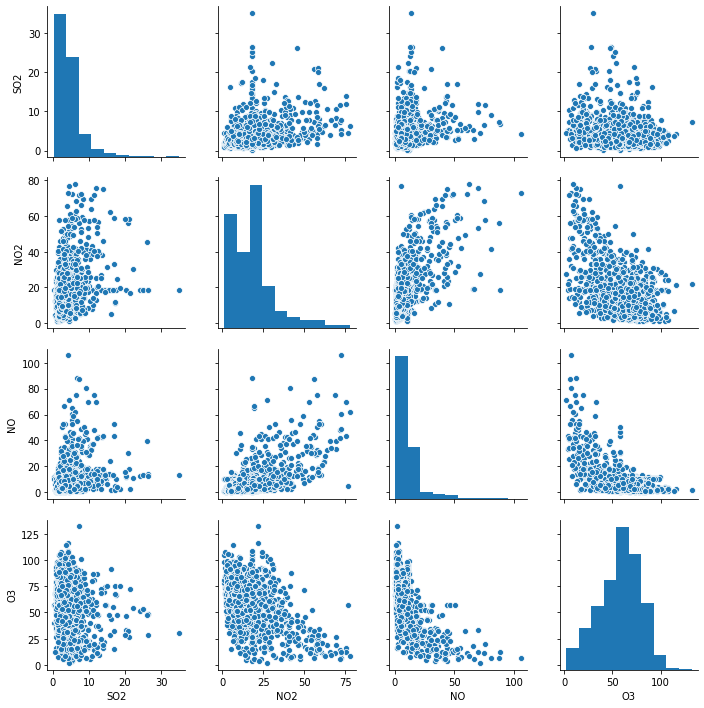

In [15]:
sns.pairplot(veri)

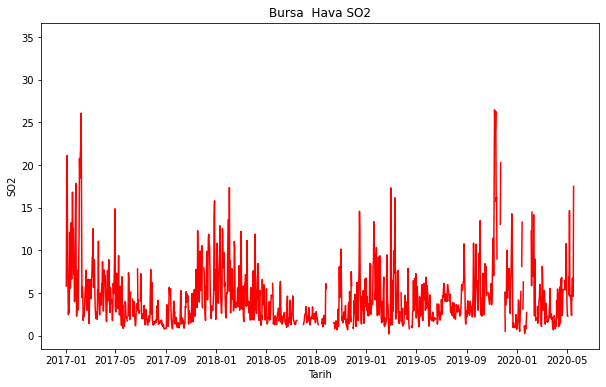

In [19]:
plt.figure(figsize=(10,6))
plt.plot(data.Tarih,data.SO2,color="red")
plt.xlabel("Tarih")
plt.ylabel("SO2")
plt.title("Bursa  Hava SO2")
plt.show()


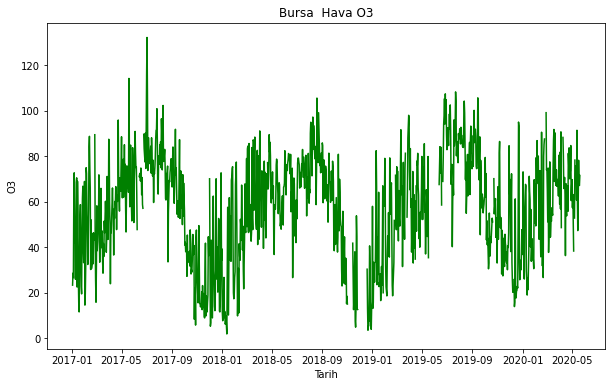

In [23]:
plt.figure(figsize=(10,6))
plt.plot(data.Tarih,data.O3,color="green")
plt.xlabel("Tarih")
plt.ylabel("O3")
plt.title("Bursa  Hava O3")
plt.show()

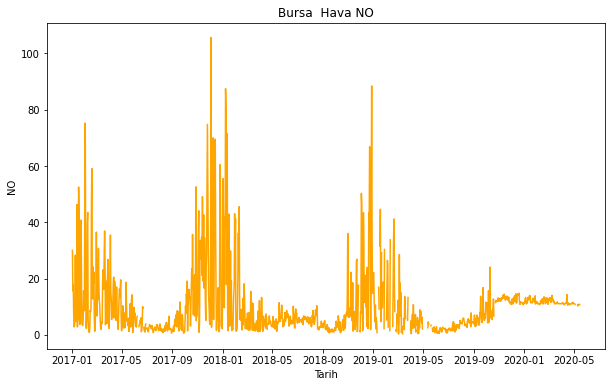

In [21]:
plt.figure(figsize=(10,6))
plt.plot(data.Tarih,data.NO,color="orange")
plt.xlabel("Tarih")
plt.ylabel("NO")
plt.title("Bursa  Hava NO")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.Tarih,data.O3,color="red")
plt.xlabel("Tarih")
plt.ylabel("O3")
plt.title("Bursa  Hava O3")
plt.show()

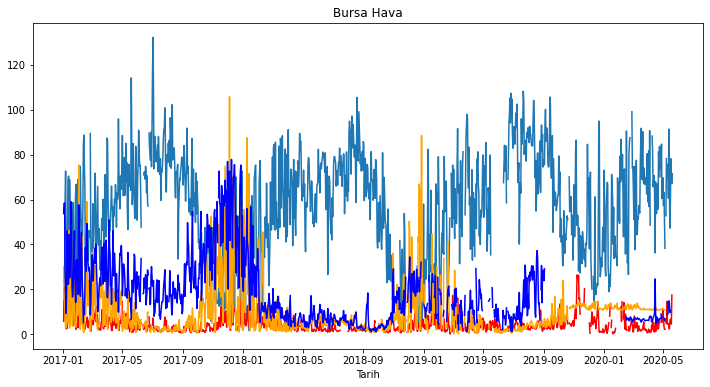

In [192]:
plt.figure(figsize=(12,6))
plt.plot(data.Tarih,data.O3)
plt.plot(data.Tarih,data.SO2,color="red")
plt.plot(data.Tarih,data.NO,color="orange")
plt.plot(data.Tarih,data.NO2,color="blue")

plt.xlabel("Tarih")
plt.title("Bursa Hava")

plt.show()